In [2]:
import race_plan_control.plan.lattice as l
import importlib as im
import numpy as np
from icecream import ic
import matplotlib.pyplot as plt
%matplotlib inline
im.reload(l)

<module 'race_plan_control.plan.lattice' from '/home/mkhonji/Dropbox/20-development/21-software-dev/21.2-autonomous-racing-stack/race_plan_control/plan/lattice.py'>

# Small Matrix

In [3]:
x0 = 5
y0 = 0
y0d_1st = 0
y0d_2nd = 0
x0d_1st = 2
x0d_2nd = 0

x1 = x0 + 10 
y1 = 3

x2 = x1 + 2
y2 = 2

def pol(x, coef):
    return coef[0]*x**3 + coef[1]* x**2 + coef[2]*x + coef[3]
def pol_d1(x, coef): 
    return 3*coef[0]*x**2 + 2*coef[1]* x + coef[2]
def pol_d2(x, coef): 
    return 6*coef[0]*x + 2*coef[1]

ic| w0_x: array([8., 0., 2., 5.])
ic| w0_y: array([3., 0., 0., 0.])
ic| y1d_1st: 81.0, y1d_2nd: 54.0, x1d_1st: 5402.0, x1d_2nd: 720.0


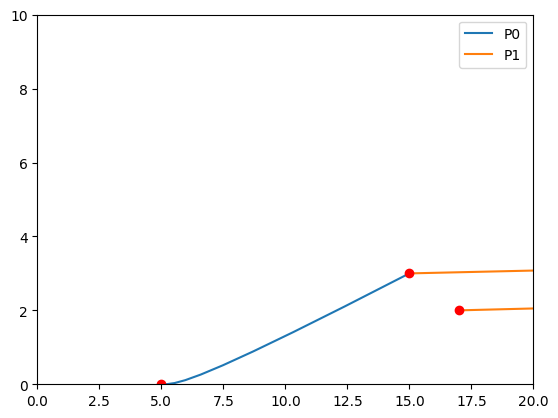

In [4]:


A = np.array([
        [0,0,0,1], # p(0)
        [1,1,1,1], # p(1)
        [0,0,1,0], # p'(0)
        [0,2,0,0],  # p''(0)
])
b0_y = np.array([y0,y1,y0d_1st,y0d_2nd])
b0_x = np.array([x0,x1,x0d_1st,x0d_2nd])

w0_y = np.linalg.solve(A,b0_y)
w0_x = np.linalg.solve(A,b0_x)

ic(w0_x)
ic(w0_y)


y1d_1st = pol_d1(y1,w0_y)
y1d_2nd = pol_d2(y1,w0_y)
x1d_1st = pol_d1(x1,w0_x)
x1d_2nd = pol_d2(x1,w0_x)
ic(y1d_1st, y1d_2nd, x1d_1st, x1d_2nd)

b1_y = np.array([y1,y2,y1d_1st,y1d_2nd])
b1_x = np.array([x1,x2,x1d_1st,x1d_2nd])

w1_y = np.linalg.solve(A,b1_y)
w1_x = np.linalg.solve(A,b1_x)

t_list = np.linspace(0,1,10)

xl0 = [pol(t, w0_x) for t in t_list]
yl0 = [pol(t, w0_y) for t in t_list]
xl1 = [pol(t, w1_x) for t in t_list]
yl1 = [pol(t, w1_y) for t in t_list]

plt.plot(xl0,yl0, label="P0")
plt.plot(xl1,yl1, label="P1")
plt.plot([x0,x1,x2],[y0,y1,y2], "ro")


plt.xlim(0,20)
plt.ylim(0,10)
plt.legend()
    


# Polyfit

/tmp/ipykernel_235432/2219339538.py:3: RankWarning: Polyfit may be poorly conditioned
  p_coef = np.polyfit(x,y,32)


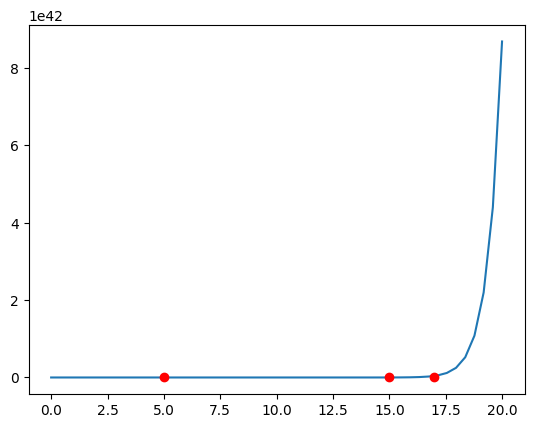

In [5]:
x = [x0,x1,x2]
y = [y0,y1,y2]
p_coef = np.polyfit(x,y,32)
fit_poly = np.poly1d(p_coef, 5)
xs = np.linspace(0,20, 50)
ys = [fit_poly(x) for x in xs]

plt.plot(xs,ys)
plt.plot([x0,x1,x2],[y0,y1,y2], "ro")

